# **Viewing classes in Directory**





In [10]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import math

dir_example = "/content/drive/MyDrive/Data"

classes = os.listdir(dir_example)
print(classes)

['README.md', 'Test', 'Train']


In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
dir_example = "/content/drive/MyDrive/Data/Train"

train_classes = os.listdir(dir_example)
print(train_classes)

['plastic', 'glass', 'trash', 'metal', 'paper', 'cardboard']


# **Visualizing Images in Dataset from each class**

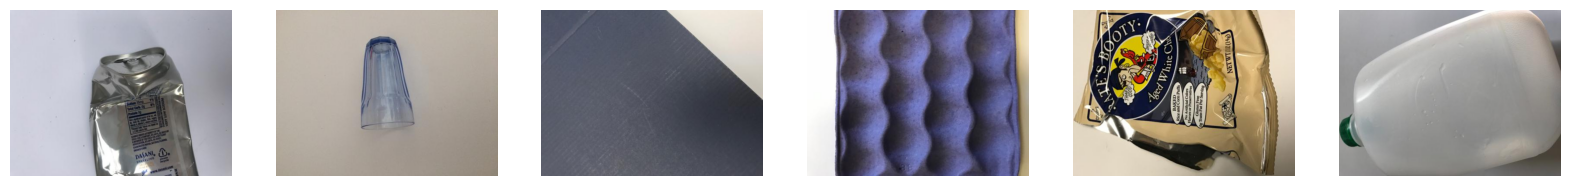

In [13]:
dir_with_examples = '/content/drive/MyDrive/visualize'
files_per_row = 6
files_in_dir = os.listdir(dir_with_examples)
number_of_cols = files_per_row
number_of_rows = int(len(files_in_dir) / number_of_cols)

# Generate the subplots
fig, axs = plt.subplots(number_of_rows, number_of_cols)
fig.set_size_inches(20, 15, forward=True)

# Map each file to subplot
try:
  for i in range(0, len(files_in_dir)):
    file_name = files_in_dir[i]
    image = Image.open(f'{dir_with_examples}/{file_name}')
    row = math.floor(i / files_per_row)
    col = i % files_per_row
    axs[col].imshow(image)
    axs[col].axis('off')
except:
  pass
# Show the plot
plt.show()

# **Importing required Libraries for Model**

In [14]:
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout, SpatialDropout2D
from tensorflow.keras.losses import sparse_categorical_crossentropy, binary_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# **Data Configuration**

In [15]:
train = '/content/drive/MyDrive/Data/Train'
test = '/content/drive/MyDrive/Data/Test'

# **Data Preparation and Loading**

### *Creating a Generator for Training Set*

In [16]:

train_generator = ImageDataGenerator(rescale = 1/255)

train_generator = train_generator.flow_from_directory(train,
                                                      target_size = (300,300),
                                                      batch_size = 32,
                                                      class_mode = 'sparse')

labels = (train_generator.class_indices)
print(labels,'\n')

labels = dict((v,k) for k,v in labels.items())
print(labels)

Found 2184 images belonging to 6 classes.
{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5} 

{0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}


### *Creating a Generator for Testing Set*

In [17]:
test_generator = ImageDataGenerator(rescale = 1./255)

test_generator = test_generator.flow_from_directory(test,
                                                    target_size = (300,300),
                                                    batch_size = 32,
                                                    class_mode = 'sparse')

test_labels = (test_generator.class_indices)
print(test_labels,'\n')

test_labels = dict((v,k) for k,v in test_labels.items())
print(test_labels)

Found 343 images belonging to 6 classes.
{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5} 

{0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}


In [18]:
for image_batch, label_batch in train_generator:
  break
image_batch.shape, label_batch.shape


((32, 300, 300, 3), (32,))

In [19]:
for image_batch, label_batch in test_generator:
  break
image_batch.shape, label_batch.shape

((32, 300, 300, 3), (32,))

# **Writing the labels into a text file '*Labels.txt* '**

In [20]:
print(train_generator.class_indices)
Labels = '\n'.join(sorted(train_generator.class_indices.keys()))

with open('Labels.txt', 'w') as file:
  file.write(Labels)

{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}


# **Model Architecture**

In [21]:
model=Sequential()

#Convolution blocks
model.add(Conv2D(32, kernel_size = (3,3), padding='same',input_shape=(300,300,3),activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(64, kernel_size = (3,3), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(32, kernel_size = (3,3), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))

#Classification layers
model.add(Flatten())

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32,activation='relu'))

model.add(Dropout(0.2))
model.add(Dense(6,activation='softmax'))


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 300, 300, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 150, 150, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 75, 75, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 37, 37, 32)        0

# **Model Compilation**

In [22]:
model.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# **Training the Model (batch_size = 32, epochs = 10)**

In [23]:
model.fit_generator(train_generator,
          epochs=10,
          steps_per_epoch=2184//32)

<ipython-input-23-fcc35ea22705>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator,


Epoch 1/10
68/68 [==============================] - 1354s 20s/step - loss: 1.6176 - accuracy: 0.3127
Epoch 2/10
68/68 [==============================] - 369s 5s/step - loss: 1.4416 - accuracy: 0.4168
Epoch 3/10
68/68 [==============================] - 380s 6s/step - loss: 1.2317 - accuracy: 0.5270
Epoch 4/10
68/68 [==============================] - 382s 6s/step - loss: 1.0916 - accuracy: 0.5883
Epoch 5/10
68/68 [==============================] - 373s 5s/step - loss: 0.9357 - accuracy: 0.6524
Epoch 6/10
68/68 [==============================] - 381s 6s/step - loss: 0.7950 - accuracy: 0.6975
Epoch 7/10
68/68 [==============================] - 371s 5s/step - loss: 0.7169 - accuracy: 0.7463
Epoch 8/10
68/68 [==============================] - 384s 6s/step - loss: 0.5626 - accuracy: 0.8011
Epoch 9/10
68/68 [==============================] - 395s 6s/step - loss: 0.5035 - accuracy: 0.8178
Epoch 10/10
68/68 [==============================] - 382s 6s/step - loss: 0.4263 - accuracy: 0.8611


# **Testing Predictions**

1/1 [==============================] - 0s 247ms/step
Probability: 0.9992023
Classified: metal 



Text(0.5, 1.0, 'Loaded Image')

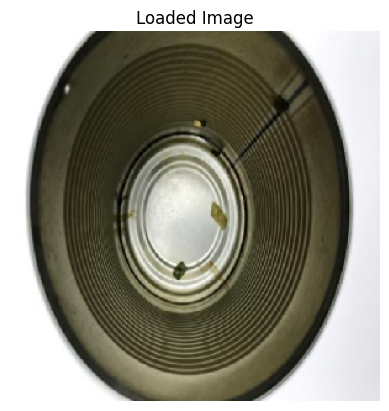

In [24]:
# from keras.preprocessing import image
import keras.utils as ku
import numpy as np
test_img = '/content/drive/MyDrive/Data/Test/metal/metal361.jpg'
img = ku.load_img(test_img, target_size = (300,300))
img = ku.img_to_array(img, dtype=np.uint8)
img = np.array(img)/255.0
prediction = model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Probability:",np.max(prediction[0], axis=-1))
predicted_class = labels[np.argmax(prediction[0], axis=-1)]
print("Classified:",predicted_class,'\n')

plt.axis('off')
plt.imshow(img.squeeze())
plt.title("Loaded Image")

In [25]:
classes = []
probability = []

for i,j in enumerate(prediction[0],0):
  print(labels[i].upper(),':',round(j*100,2),'%')

CARDBOARD : 0.0 %
GLASS : 0.08 %
METAL : 99.92 %
PAPER : 0.0 %
PLASTIC : 0.0 %
TRASH : 0.0 %


1/1 [==============================] - 0s 59ms/step
Probability: 0.533407
Classified: glass 



Text(0.5, 1.0, 'Loaded Image')

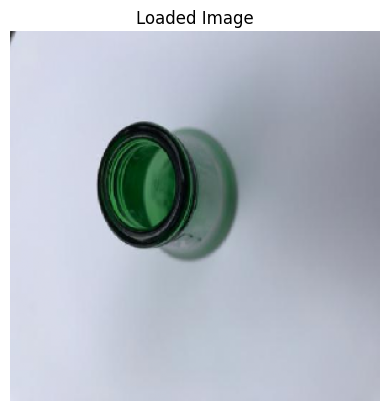

In [30]:
test_img = '/content/drive/MyDrive/Data/Test/glass/glass422.jpg'
img = ku.load_img(test_img, target_size = (300,300))
img = ku.img_to_array(img, dtype=np.uint8)
img = np.array(img)/255.0
prediction = model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Probability:",np.max(prediction[0], axis=-1))
predicted_class = labels[np.argmax(prediction[0], axis=-1)]
print("Classified:",predicted_class,'\n')

plt.axis('off')
plt.imshow(img.squeeze())
plt.title("Loaded Image")

In [38]:
classes = []
probability = []

for i,j in enumerate(prediction[0],0):
  print(labels[i].upper(),':',round(j*100,2),'%')

CARDBOARD : 5.36 %
GLASS : 64.84 %
METAL : 3.55 %
PAPER : 5.25 %
PLASTIC : 16.73 %
TRASH : 4.27 %


1/1 [==============================] - 0s 94ms/step
Probability: 0.8200474
Classified: plastic 



Text(0.5, 1.0, 'Loaded Image')

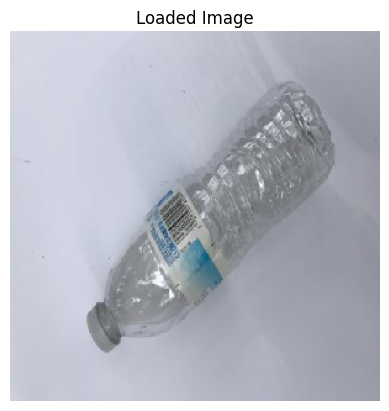

In [32]:
test_img = '/content/drive/MyDrive/Data/Test/plastic/plastic425.jpg'
img = ku.load_img(test_img, target_size = (300,300))
img = ku.img_to_array(img, dtype=np.uint8)
img = np.array(img)/255.0
prediction = model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Probability:",np.max(prediction[0], axis=-1))
predicted_class = labels[np.argmax(prediction[0], axis=-1)]
print("Classified:",predicted_class,'\n')

plt.axis('off')
plt.imshow(img.squeeze())
plt.title("Loaded Image")

In [33]:
classes = []
probability = []

for i,j in enumerate(prediction[0],0):
  print(labels[i].upper(),':',round(j*100,2),'%')

CARDBOARD : 0.15 %
GLASS : 15.94 %
METAL : 0.49 %
PAPER : 1.39 %
PLASTIC : 82.0 %
TRASH : 0.02 %


### *Testing shows that the model is fairly successful in classifying the type of waste*

1/1 [==============================] - 0s 60ms/step
Probability: 0.9997464
Classified: cardboard 



Text(0.5, 1.0, 'Loaded Image')

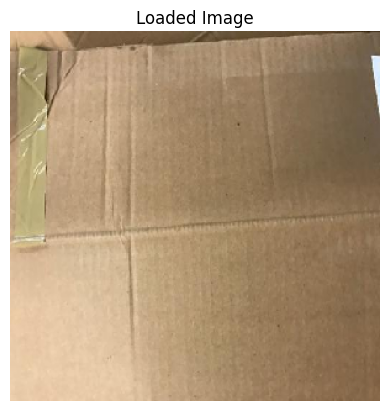

In [34]:
test_img = '/content/drive/MyDrive/Data/Test/cardboard/cardboard355.jpg'
img = ku.load_img(test_img, target_size = (300,300))
img = ku.img_to_array(img, dtype=np.uint8)
img = np.array(img)/255.0
prediction = model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Probability:",np.max(prediction[0], axis=-1))
predicted_class = labels[np.argmax(prediction[0], axis=-1)]
print("Classified:",predicted_class,'\n')

plt.axis('off')
plt.imshow(img.squeeze())
plt.title("Loaded Image")

In [39]:
classes = []
probability = []

for i,j in enumerate(prediction[0],0):
  print(labels[i].upper(),':',round(j*100,2),'%')

CARDBOARD : 5.36 %
GLASS : 64.84 %
METAL : 3.55 %
PAPER : 5.25 %
PLASTIC : 16.73 %
TRASH : 4.27 %


1/1 [==============================] - 0s 59ms/step
Probability: 0.8185432
Classified: paper 



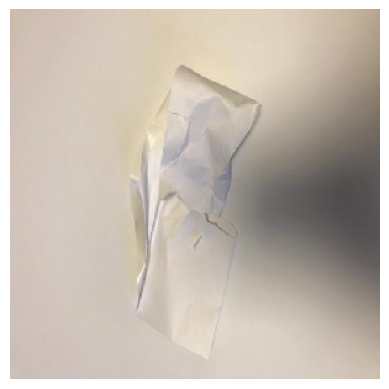

In [35]:
test_img = '/content/drive/MyDrive/Data/Test/paper/paper505.jpg'
img = ku.load_img(test_img, target_size = (300,300))
img = ku.img_to_array(img, dtype=np.uint8)
img = np.array(img)/255.0
prediction = model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Probability:",np.max(prediction[0], axis=-1))
predicted_class = labels[np.argmax(prediction[0], axis=-1)]
print("Classified:",predicted_class,'\n')

plt.axis('off')
plt.imshow(img.squeeze())

1/1 [==============================] - 0s 65ms/step
Probability: 0.36377832
Classified: cardboard 



Text(0.5, 1.0, 'Loaded Image')

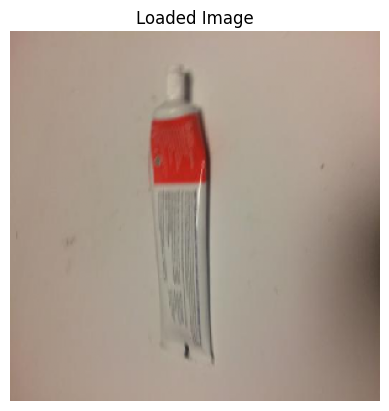

In [47]:
test_img = '/content/drive/MyDrive/Data/Test/trash/trash131.jpg'
img = ku.load_img(test_img, target_size = (300,300))
img = ku.img_to_array(img, dtype=np.uint8)
img = np.array(img)/255.0
prediction = model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Probability:",np.max(prediction[0], axis=-1))
predicted_class = labels[np.argmax(prediction[0], axis=-1)]
print("Classified:",predicted_class,'\n')

plt.axis('off')
plt.imshow(img.squeeze())
plt.title("Loaded Image")

## ***Saving model as 'model.h5'***

In [43]:
classes = []
probability = []

for i,j in enumerate(prediction[0],0):
  print(labels[i].upper(),':',round(j*100,2),'%')

CARDBOARD : 30.86 %
GLASS : 23.5 %
METAL : 26.3 %
PAPER : 11.01 %
PLASTIC : 3.29 %
TRASH : 5.04 %


In [37]:
model.save('weights/model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
